In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score

## Data

In [5]:
train_data=pd.read_csv("Churn History Dataset.csv")
test_data=pd.read_csv("Churn Test Dataset.csv")

In [6]:
train_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


In [7]:
train_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Y_var'],
      dtype='object')

In [8]:
train_data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3332.000000,3332.000000,3331.000000,3333.000000,3332.000000,3333.000000,3331.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,190.740294,103.218788,101.768574,201.005734,100.343834,17.085633,201.808803,100.373762,16.062715,10.523132,4.488749,13.128689,1.572757
std,39.822106,42.371290,13.688365,598.879213,128.891770,4025.094680,50.709102,23.781417,4.309621,75.438537,24.880650,405.568376,12.241776,2.513638,598.319452,1.430420
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.600000,114.000000,36.825000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,34545.000000,7100.000000,232343.000000,363.700000,850.000000,30.910000,3434.340000,987.000000,23423.000000,600.600000,34.000000,34545.000000,34.000000


Columns such as total day minutes,calls,charge,total intl minutes,calls,charge,number customer serve calls etc.. has Outliers.
Outlier is identified by looking into min values..for all these min value is 0 but max value is higher

In [9]:
train_data.isnull().sum()


state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 1
total eve minutes                2
total eve calls                  0
total eve charge                 1
total night minutes              0
total night calls                2
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Y_var                            0
dtype: int64

In [10]:
train_data.fillna(0,inplace=True)

In [11]:
train_data.isnull().sum()


state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Y_var                            0
dtype: int64

### Seperating categorical variable and continuous variable

In [12]:
categorical_var = list(train_data.dtypes.loc[train_data.dtypes == 'object'].index)

In [13]:
continuous_var1 = list(train_data.dtypes.loc[train_data.dtypes == 'float64'].index)
continuous_var2=list(train_data.dtypes.loc[train_data.dtypes == 'int64'].index)
continuous_var =continuous_var1+continuous_var2
continuous_var

['total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl charge',
 'account length',
 'area code',
 'number vmail messages',
 'total eve calls',
 'total intl calls',
 'number customer service calls']

In [14]:
train_data.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                  float64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                float64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Y_var                             object
dtype: object

In [15]:
train_data['Y_var'] = train_data['Y_var'].str.replace('.', '')

In [16]:
train_data['Y_var'].value_counts()

 False    2829
 True      504
Name: Y_var, dtype: int64

## EDA

### Churn variable with categorical variables

In [17]:
for var in categorical_var:
    if var!='Y_var':
        test = train_data.groupby([var,'Y_var'])
        print(test.size(),'\n\n')

state  Y_var 
AK      False    48
        True      4
AL      False    71
        True      9
AR      False    43
                 ..
WI      True      7
WV      False    94
        True     12
WY      False    68
        True      9
Length: 102, dtype: int64 


phone number  Y_var 
 327-1058      False    1
 327-1319      False    1
 327-3053      False    1
 327-3587      True     1
 327-3850      False    1
                       ..
 422-7728      False    1
 422-8268      False    1
 422-8333      False    1
 422-8344      False    1
 422-9964      False    1
Length: 3333, dtype: int64 


international plan  Y_var 
 no                  False    2664
                     True      346
 yes                 False     165
                     True      158
dtype: int64 


voice mail plan  Y_var 
 no               False    1992
                  True      419
 yes              False     837
                  True       85
dtype: int64 




In [18]:
train_data['Y_var'].value_counts()

 False    2829
 True      504
Name: Y_var, dtype: int64

In [22]:
import plotly.express as px
target_instance = train_data['Y_var'].value_counts()
fig = px.pie(target_instance, values=target_instance, names=['yes','no'], title='Churn Distribution')
fig.show()

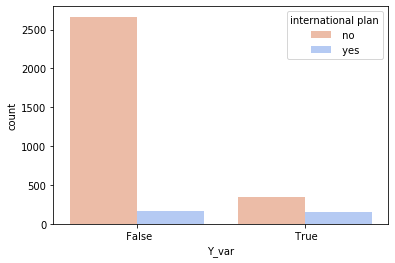

In [23]:
sns.countplot(x='Y_var',data=train_data,hue='international plan',palette="coolwarm_r")


**Outlier Detection**

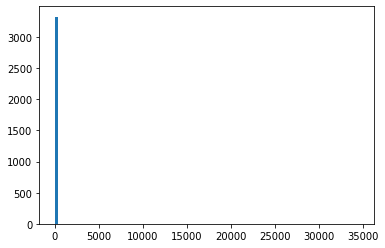

In [24]:
plt.hist(train_data['total day minutes'],bins=100)
plt.show()

In [25]:
#Finding upper and lower limit
upper_limit = train_data['total day minutes'].quantile(0.99)
lower_limit = train_data['total day minutes'].quantile(0.01)

In [26]:
#Capping
train_data['total day minutes'] = np.where(train_data['total day minutes'] >= upper_limit,
        upper_limit,
        np.where(train_data['total day minutes'] <= lower_limit,
        lower_limit,
        train_data['total day minutes']))

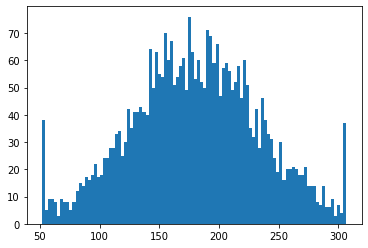

In [27]:
plt.hist(train_data['total day minutes'],bins=100)
plt.show()

[]

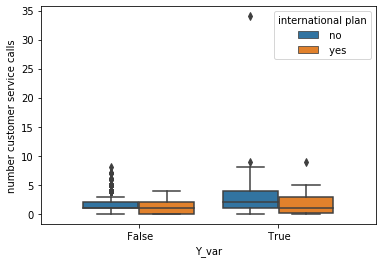

In [28]:
sns.boxplot(x='Y_var',y='number customer service calls',data=train_data,sym=" ",hue='international plan')
plt.plot()

In [29]:
#Finding upper and lower limit
upper_limit = train_data['number customer service calls'].quantile(0.99)
lower_limit = train_data['number customer service calls'].quantile(0.01)

In [30]:
#Capping
train_data['number customer service calls'] = np.where(train_data['number customer service calls'] >= upper_limit,
        upper_limit,
        np.where(train_data['number customer service calls'] <= lower_limit,
        lower_limit,
        train_data['number customer service calls']))

[]

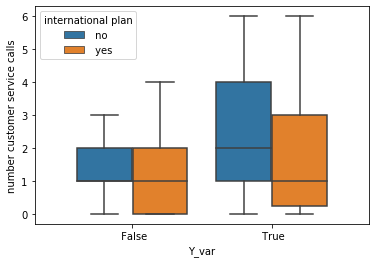

In [31]:
sns.boxplot(x='Y_var',y='number customer service calls',data=train_data,sym="",hue='international plan')
plt.plot()

In [32]:
corr = train_data.corr()


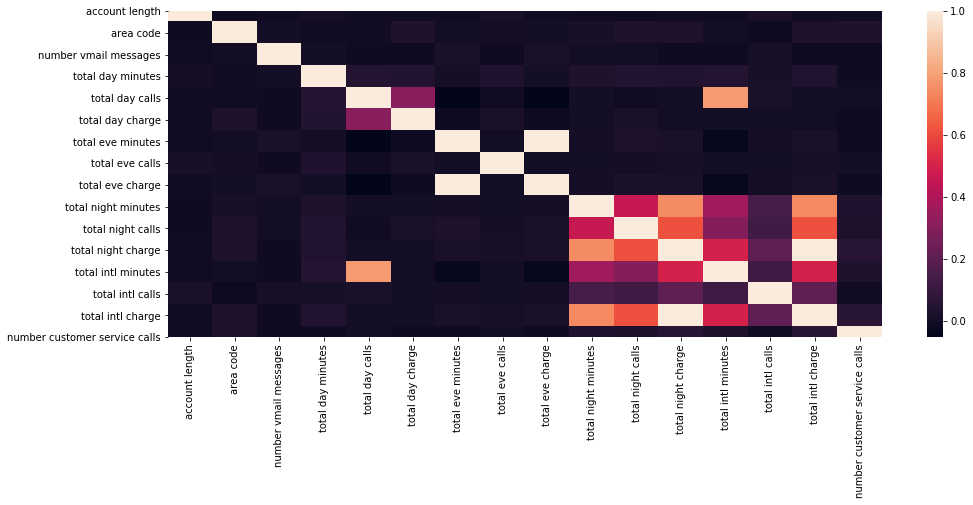

In [33]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr)


## Feature selection for categorical data based on chi square

In [34]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = train_data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in categorical_var:
    cT.TestIndependence(colX=var,colY="Y_var" ) 


state is IMPORTANT for Prediction
phone number is NOT an important predictor. (Discard phone number from model)
international plan is IMPORTANT for Prediction
voice mail plan is IMPORTANT for Prediction
Y_var is IMPORTANT for Prediction


In [35]:
for var in categorical_var:
    train_data[var] = train_data[var].astype('category')

In [36]:
train_data[categorical_var] = train_data[categorical_var].apply(lambda x: x.cat.codes)

## Model building on training data

In [37]:
X_train=train_data[['state','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge','total intl minutes','total intl calls','total intl charge','number customer service calls']]

In [38]:
Y_train=train_data['Y_var']

***Removing outliers by capping:  for x train data***

In [39]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df



In [40]:
X_train=cap_data(X_train)

capping the  state
capping the  international plan
capping the  voice mail plan
capping the  number vmail messages
capping the  total day minutes
capping the  total day calls
capping the  total day charge
capping the  total intl minutes
capping the  total intl calls
capping the  total intl charge
capping the  number customer service calls


In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_transform=sc.fit_transform(X_train)

**Logistic Regression**

In [42]:
model = LogisticRegression()
fit = model.fit(X_train_transform, Y_train)

**Decision Tree**

In [43]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_transform,Y_train)

 **Random forest**

In [44]:
#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf=rf.fit(X_train_transform,Y_train)

In [45]:
feature_imp = rf.feature_importances_
feature_imp

array([0.06388461, 0.10598394, 0.02026851, 0.03696495, 0.17340728,
       0.06952116, 0.16450876, 0.07560442, 0.07625132, 0.07751126,
       0.13609378])

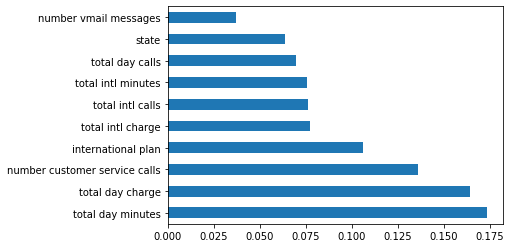

In [46]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

Based on this data, we can see that total day minute has the highest impact on customer churn, followed by total day charge and number customer service calls

## Test data 

In [47]:
test_data['Churn Indicator'] = test_data['Churn Indicator'].str.replace('.', '')

In [48]:
test_data.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn Indicator                  0
dtype: int64

**Seperating categorical variable and continuous variable**

In [49]:
categorical_var_test = list(test_data.dtypes.loc[test_data.dtypes == 'object'].index)

In [50]:
continuous_var1 = list(test_data.dtypes.loc[test_data.dtypes == 'float64'].index)
continuous_var2=list(test_data.dtypes.loc[test_data.dtypes == 'int64'].index)
continuous_var_test =continuous_var1+continuous_var2
continuous_var_test

['total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve charge',
 'total night minutes',
 'total night charge',
 'total intl minutes',
 'total intl charge',
 'account length',
 'area code',
 'number vmail messages',
 'total day calls',
 'total eve calls',
 'total night calls',
 'total intl calls',
 'number customer service calls']

**Categorical variable encoding**

In [51]:
for var in categorical_var_test:
    test_data[var] = test_data[var].astype('category')

In [52]:
test_data[categorical_var_test] = test_data[categorical_var_test].apply(lambda x: x.cat.codes)

#### Model building on test data

In [53]:
X_test=test_data[['state','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge','total intl minutes','total intl calls','total intl charge','number customer service calls']]

In [54]:
Y_test=test_data['Churn Indicator']

In [55]:
X_test_transform = sc.transform(X_test)

**Logistic Regression**

In [56]:
Y_pred_lr=model.predict(X_test_transform)

In [57]:
lin_mse = mean_squared_error(Y_test, Y_pred_lr)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3812281839393109

Performance Measure

In [58]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_lr)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_lr)*100)

[[1378   54]
 [ 189   51]]
Accuracy: 85.46650717703349


In [59]:
print(classification_report(Y_test,Y_pred_lr)) 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1432
           1       0.49      0.21      0.30       240

    accuracy                           0.85      1672
   macro avg       0.68      0.59      0.61      1672
weighted avg       0.82      0.85      0.83      1672



**Decision tree**

In [60]:
#Predict the response for test dataset
Y_pred = clf.predict(X_test_transform)

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)*100)

[[1309  123]
 [  92  148]]
Accuracy: 87.14114832535886


In [61]:
print(classification_report(Y_test,Y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1432
           1       0.55      0.62      0.58       240

    accuracy                           0.87      1672
   macro avg       0.74      0.77      0.75      1672
weighted avg       0.88      0.87      0.87      1672



**Random Forest**

In [62]:
Y_pred_rf=rf.predict(X_test_transform)

In [63]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_rf)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rf)*100)

[[1394   38]
 [  91  149]]
Accuracy: 92.28468899521532


In [64]:
print(classification_report(Y_test,Y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1432
           1       0.80      0.62      0.70       240

    accuracy                           0.92      1672
   macro avg       0.87      0.80      0.83      1672
weighted avg       0.92      0.92      0.92      1672



**Performance Measure between random forest and logistic regression**

In [65]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(Y_test, Y_pred_lr)
fpr_2, tpr_2, thresholds = roc_curve(Y_test, Y_pred_rf)
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)

Text(0.5, 0, 'False Positive Rate')

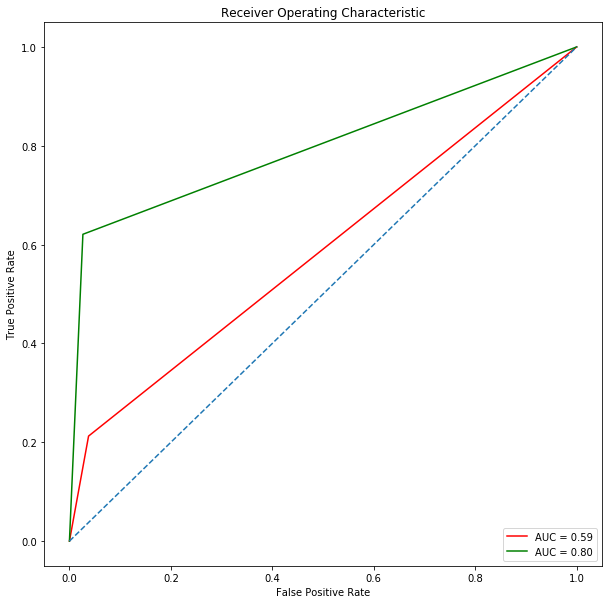

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1,tpr_1, color='red',label = 'AUC = %0.2f' % roc_auc_1)
plt.plot(fpr_2,tpr_2, color='green',label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Higher the AUC, the better the performance of the model . From the above curve,AUC = 0.80 for Random forest.

Performance of different models are calculated by accuracy,confusion matrix and roc curve

**Based on this, Random forest is the best model for our dataset**

In [67]:
test_data['Y_pred_rf'] = Y_pred_rf

In [73]:
test_data.loc[test_data['Y_pred_rf'] ==0 , 'Churn rate'] = 'Low'
test_data.loc[test_data['Y_pred_rf'] ==1 , 'Churn rate'] = 'High'

In [74]:
test_data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator,Y_pred_rf,Churn rate
0,11,101,510,451,0,0,0,70.9,123,12.05,...,236.0,73,10.62,10.6,3,2.86,3,0,0,Low
1,26,137,510,906,0,0,0,223.6,86,38.01,...,94.2,81,4.24,9.5,7,2.57,0,0,0,Low
2,35,103,408,1467,1,1,29,294.7,95,50.10,...,300.3,127,13.51,13.7,6,3.70,1,0,0,Low
3,32,99,415,1605,0,0,0,216.8,123,36.86,...,220.6,82,9.93,15.7,2,4.24,1,0,0,Low
4,40,108,415,1503,0,0,0,197.4,78,33.56,...,204.5,107,9.20,7.7,4,2.08,2,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,9,113,415,1157,0,0,0,244.7,97,55.13,...,215.1,90,9.68,13.6,6,3.67,1,1,1,High
1668,29,23,415,1096,0,0,0,155.6,122,30.07,...,50.9,130,2.29,10.6,5,2.86,1,1,0,Low
1669,49,166,408,1306,0,1,41,196.7,109,33.44,...,198.3,94,8.92,11.0,2,2.97,1,1,0,Low
1670,10,69,408,1643,0,0,0,215.9,122,36.70,...,301.8,129,13.58,6.1,6,1.65,3,1,0,Low


In [75]:
test_data['Churn rate'].value_counts()

Low     1485
High     187
Name: Churn rate, dtype: int64

[Text(0.5, 1.0, 'Churn Rate Prediction')]

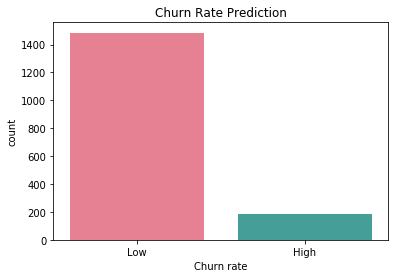

In [82]:
sns.countplot(x='Churn rate',data=test_data,palette="husl").set(title='Churn Rate Prediction')